<a href="https://colab.research.google.com/github/RodrigoOliveira2342/PDS-PDI-Note-MRI/blob/main/PDI_RMI_RodrigoOliveira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Análise de Dados**

**2. Ideias de aplicações com Redes Neurais Convolucionais**

**3. Adaptando softwares para dispositivos ARM**

 **1.  Análise de Dados**

NIFtI é o formato mais comum encontrado para neuroimagem:

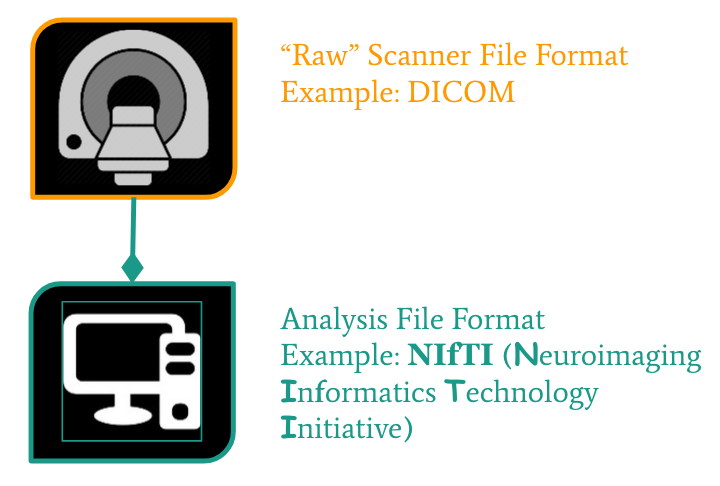

NiBabel é um pacote Python para leitura e gravação de dados de neuroimagem.

In [ ]:
import nibabel as nib

Escolhendo um exemplo:

In [ ]:
!wget -L  'https://github.com/RodrigoOliveira2342/PDS-PDI-Note-MRI/raw/main/T1.nii.gz'

--2023-06-27 04:34:41--  https://github.com/RodrigoOliveira2342/PDS-PDI-Note-MRI/raw/main/T1.nii.gz
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RodrigoOliveira2342/PDS-PDI-Note-MRI/main/T1.nii.gz [following]
--2023-06-27 04:34:41--  https://raw.githubusercontent.com/RodrigoOliveira2342/PDS-PDI-Note-MRI/main/T1.nii.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7297561 (7.0M) [application/octet-stream]
Saving to: ‘T1.nii.gz’

T1.nii.gz           100%[===================>]   6.96M  --.-KB/s    in 0.07s   

2023-06-27 04:34:42 (106 MB/s) - ‘T1.nii.gz’ saved [7297561/7297561]



In [ ]:
t1_img = nib.load("T1.nii.gz")
t1_data = t1_img.get_fdata()

Uma imagem 2D é composta por pixels, enquanto uma imagem 3D de ressonância magnética (RM) é composta por voxels.

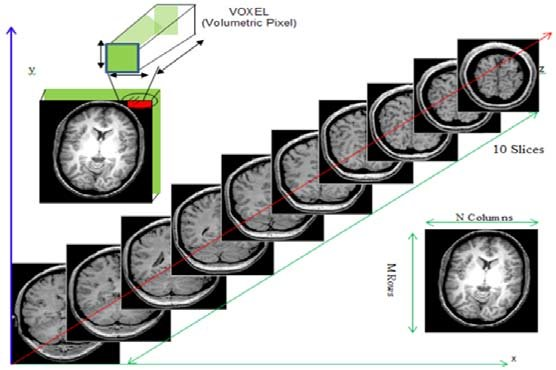

Para visualização, podemos fatiar para gerar imagens 2D:

In [ ]:
x_slice = t1_data[100, :, :]
y_slice = t1_data[:, 100, :]
z_slice= t1_data [:, :, 100]

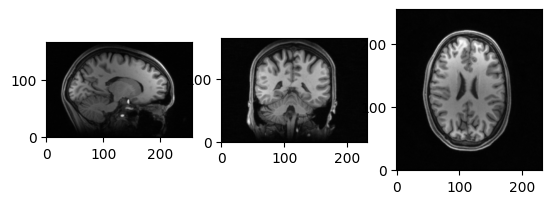

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

slices = [x_slice, y_slice, z_slice]

fig, axes = plt.subplots(1, len(slices))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

A matriz nos permite traduzir entre as coordenadas do voxel em (x,y,z)

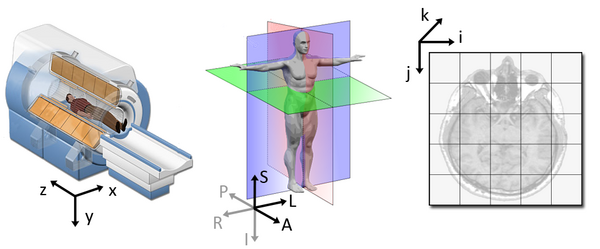

**2. Ideias de aplicações com Redes Neurais Convolucionais**

Existem vários conjuntos de dados gratuitos disponíveis para modelos de treinamento com ressonância magnética

**2.1 Alzheimer's Dataset**

Nesse site é possivel encontrar um conjunto de dados para treinamento voltado para Alzheimer: https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images, alem disso é possível encontrar varios modelos ja exemplificados para o uso de de Redes neurais convolucionais, as imagens estão subdivididas em 4 grupos depedendo do grau de demecia

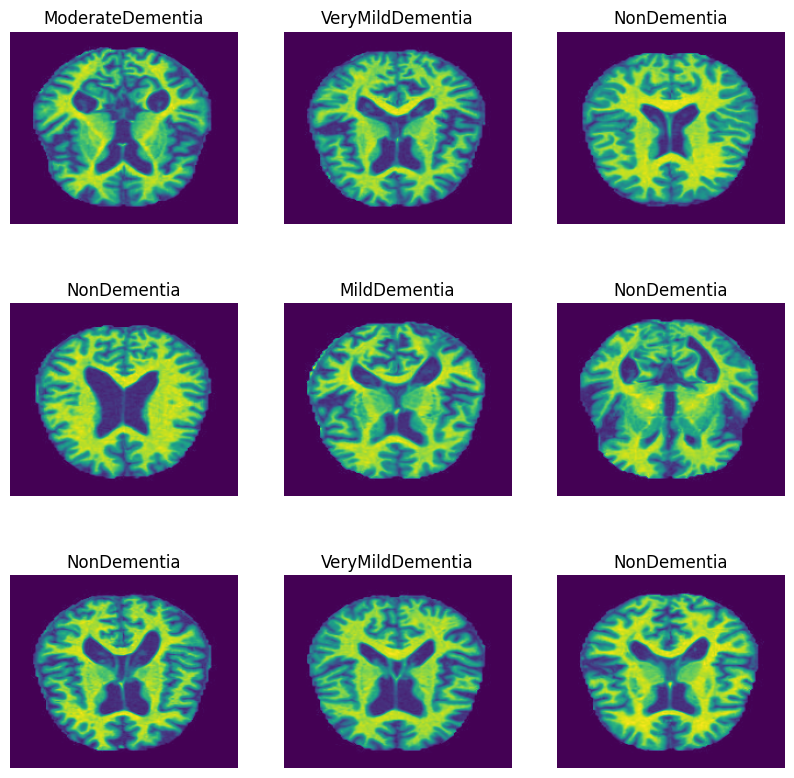

**2.2 Tumor Detection Dataset**

Nesse site é possivel encontrar um conjunto de dados para treinamento voltado para a detecção de tumor: https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation, as imagens foram obtidas do The Cancer Imaging Archive (TCIA).

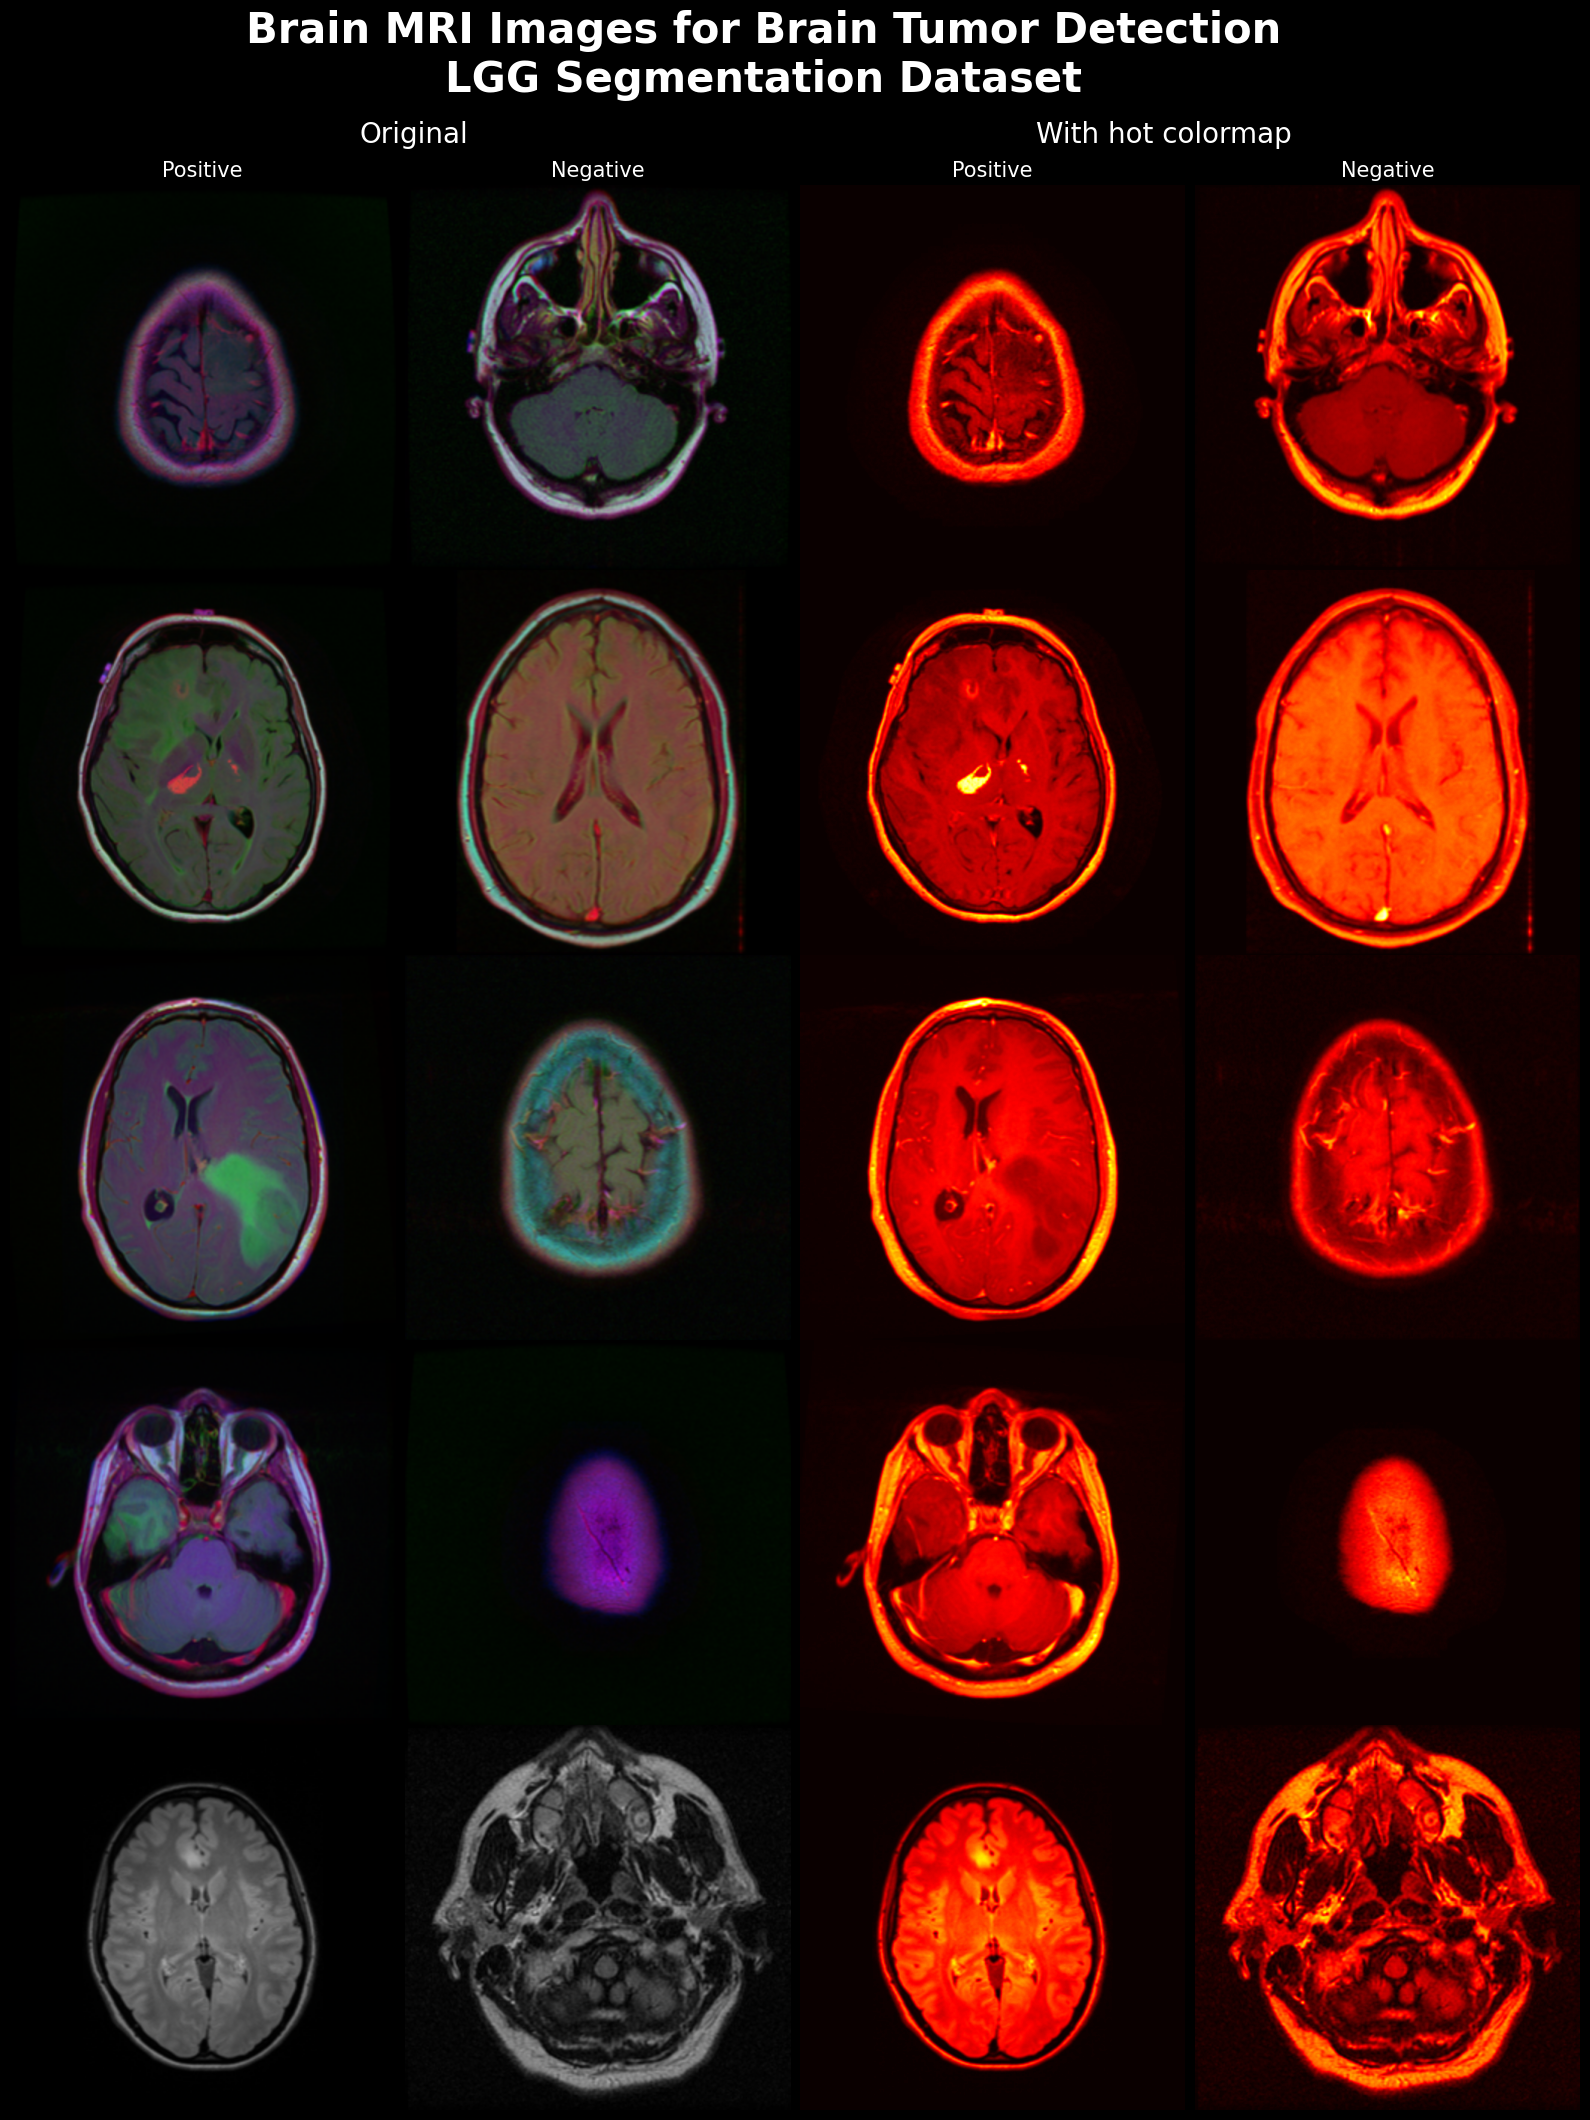

**3. Adaptando softwares para dispositivos ARM**

Quando utilizando uma arquitetura ARM, é possível encontrar desafios relacionados à compatibilidade de software devido à limitação de disponibilidade de programas compilados especificamente para essa arquitetura. Isso ocorre porque muitos softwares são desenvolvidos e compilados visando outras arquiteturas diferentes da ARM. Como resultado, pode haver dificuldades em utilizar esses softwares diretamente em um ambiente ARM, a menos que sejam realizadas adaptações, como a recompilação ou a utilização de ferramentas de emulação. Essa incompatibilidade arquitetural pode requerer esforços adicionais para viabilizar o uso dos softwares desejados em um sistema baseado em arquitetura ARM.

Algumas dependências podem ser importantes:

In [ ]:
# sudo dpkg --add-architecture armhf

# sudo apt update && sudo apt install build-essential git cmake gcc-arm-linux-gnueabihf libc6-dev-armhf-cross libappindicator1 libnm0 libtcmalloc-minimal4 binfmt-support liblttng-ust-dev libcairo2:armhf libgmp10:armhf libvulkan1:armhf libudev-dev:armhf -y

Box64

In [ ]:
#git clone https://github.com/ptitSeb/box64
#cd box64
#mkdir build; cd build; cmake .. -DRK3588=1 -DCMAKE_BUILD_TYPE=RelWithDebInfo
#make -j4
#sudo make install

Box86

In [ ]:
#cd ~
#git clone https://github.com/ptitSeb/box86
#cd box86
#mkdir build; cd build; cmake .. -DRK3588=1 -DCMAKE_BUILD_TYPE=RelWithDebInfo
#make -j4
#sudo make install

Atualizar ou instalar os drivers 3D, nessa etapa é preciso considerar a compatibilidade com o dispositivo e a versão do sistema operacional utilizado.É importante ressaltar que a instalação ou atualização de drivers 3D requer conhecimento técnico adequado e precauções, como realizar backups de dados importantes e seguir as orientações fornecidas pelos fabricantes.
Um exemplo:

In [ ]:
#sudo add-apt-repository ppa:liujianfeng1994/panfork-mesa
#sudo add-apt-repository ppa:liujianfeng1994/rockchip-multimedia
#sudo apt update
#sudo apt dist-upgrade -y
#sudo apt install mali-g610-firmware rockchip-multimedia-config -y

Exemplo de software que funcionou:
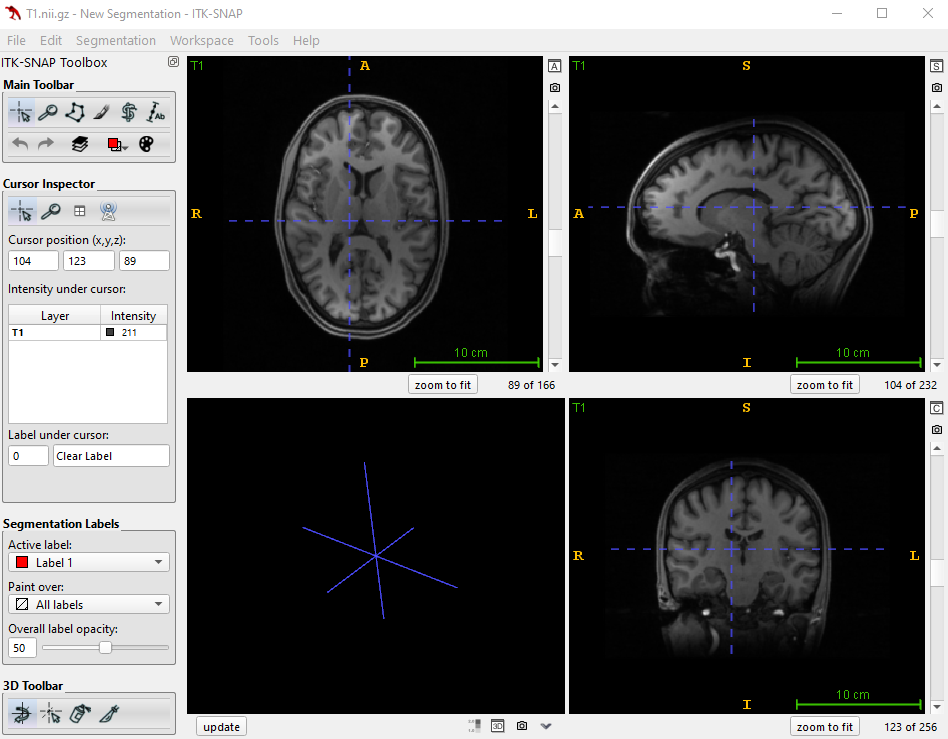